
**Autor**: Guilherme Ribeiro Maia

**Contato**: 
email: `gribeiromaia91@gmail.com`

linkedin: https://www.linkedin.com/in/guilherme-ribeiro-maia-650589112/

<br>
<img align="left" width="280" src="https://hermes.digitalinnovation.one/site/images/logo-sm-white.png"/>
<br>


---

In [ ]:
dados['valor_com_desconto'] = dados['valor']*dados['desconto']



<center><p><h1>Data Discovery Pandas
<h1></p></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pacotes Utilizados

In [3]:
#Manipulação de Dados
import pandas as pd
import numpy as np

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Dados

Os dados dessa competição você será desafiado a construir um modelo que prediz a probabilidade de aquisição de um produto. Aqui nesse curso não entraremos no ponto de craição de um modelo, esse assunto ja foi tratado em momentos anteriores, porém vamos utlizar esses mesmos dados para compreender o que o pacotes pandas pode nos fornecer e ajudar em analises.

---

https://www.kaggle.com/c/porto-seguro-data-challenge

---

In [4]:
metadados = pd.read_csv('/content/drive/MyDrive/Digital Innovation One/desafio_porto_seguro_metadata.csv')
dados = pd.read_csv('/content/drive/MyDrive/Digital Innovation One/desafio_porto_seguro_train.csv')

# Entendimento dos Metadados

#### Qualitativo Nominal 


> Variáveis nominais: não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio e etc

In [7]:
metadados[metadados['Variavel tipo'] == 'Qualitativo nominal'].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,28,29,30,31,33,34,35,36,37,38,39,41
Variavel cod,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var28,var29,var30,var31,var33,var34,var35,var36,var37,var38,var39,var41
Variavel tipo,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal


In [8]:
nominal = list(metadados[metadados['Variavel tipo'] == 'Qualitativo nominal']['Variavel cod'])

In [12]:
dados[nominal].head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var28,var29,var30,var31,var33,var34,var35,var36,var37,var38,var39,var41
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,24,4,2,0,3,44,463,27,2,0,4,3
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,4,2,1,0,0,1,532,2,1,0,4,3
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,3,4,1,0,1,3,81,26,3,0,4,3
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,19,1,2,0,0,11,414,27,0,0,4,3
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,3,4,1,0,4,3,567,8,3,2,4,3


#### Qualitativo ordinal

> Existe uma ordenação entre as categorias. Exemplos: escolaridade (1 grau, 2 graus, 3 graus), estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, dezembro)

In [13]:
metadados[metadados['Variavel tipo'] == 'Qualitativo ordinal'].T

,26,32,42,43
Variavel cod,var26,var32,var42,var43
Variavel tipo,Qualitativo ordinal,Qualitativo ordinal,Qualitativo ordinal,Qualitativo ordinal


In [14]:
ordinal = list(metadados[metadados['Variavel tipo'] == 'Qualitativo ordinal']['Variavel cod'])

In [15]:
dados[ordinal].head()

,var26,var32,var42,var43
0,7,16,25,6
1,6,14,30,3
2,7,11,23,5
3,1,8,22,10
4,8,17,26,5


#### Quantitativo discreto

> Quando o conjunto de resultados possíveis é finito ou enumerável. Exemplo: número de filhos, alunos numa escola etc. 

In [16]:
metadados[metadados['Variavel tipo'] == 'Quantitativo discreto'].T

,24,25,27,40,44,45,46,47,48,49,50,51,52,53,54,67,68,69
Variavel cod,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
Variavel tipo,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto


In [17]:
discretas = list(metadados[metadados['Variavel tipo'] == 'Quantitativo discreto']['Variavel cod'])

In [19]:
dados[discretas].head(10)

,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
0,0,4,0,9,1,4,3,1,0,0,0,0,42,1,1,0.132353,0.139706,1
1,2,1,1,7,0,0,0,0,0,0,0,0,20,1,1,0.147059,0.106618,0
2,2,1,0,3,1,0,0,0,0,0,0,0,12,1,1,0.382353,0.242647,0
3,0,0,1,10,1,1,1,0,1,1,0,0,36,1,1,0.147059,0.132353,0
4,2,1,1,5,1,0,0,0,0,1,0,0,19,1,1,0.455882,0.132353,1
5,0,0,0,2,1,0,0,0,0,1,0,0,15,1,1,-999.000000,0.198529,0
6,0,1,0,2,1,0,0,0,0,0,0,1,30,1,1,0.514706,0.224265,0
7,0,0,0,9,1,0,0,0,0,0,0,0,34,1,1,-999.000000,0.301471,0
8,0,1,1,10,1,0,0,0,0,0,0,0,16,3,1,0.220588,0.143382,0
9,2,4,0,4,1,0,0,0,0,0,1,0,15,1,1,0.161765,0.106618,0


#### Quantitativo continua

>  Variáveis quantitativas contínuas – quando resultam de um número infinito de valores possíveis que podem ser associados a pontos em uma escala contínua, de modo que não haja lacunas ou interrupções. Por exemplo, o peso de um pacote de arroz e o comprimento de um parafuso constituem variáveis contínuas.

In [20]:
metadados[metadados['Variavel tipo'] == 'Quantitativo continua'].T

,55,56,57,58,59,60,61,62,63,64,65,66
Variavel cod,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
Variavel tipo,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua


In [21]:
continuas = list(metadados[metadados['Variavel tipo'] == 'Quantitativo continua']['Variavel cod'])

In [22]:
dados[continuas].head()

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
0,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603
1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000
2,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000
3,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201
4,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000


# Formas de Leitura

> CSV

Fonte: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [44]:
exemplo = pd.read_csv('/content/drive/MyDrive/Digital Innovation One/desafio_porto_seguro_train.csv'
                   
                    # Sepação de Coluna
                    ,sep = ','
                   
                    # Quantas linhas desejo ler
                    ,nrows = 5
                   
                    # Quero Ler Colunas Específica
                    ,usecols = ['id','var12']
                   
                    #Declarar Tipo do Dados
                    #,dtype = 'string'
                    ,dtype = {'id': np.float64, 'var12': 'string'}

)

In [46]:
exemplo.dtypes

id       float64
var12     string
dtype: object

In [47]:
exemplo.head()

,id,var12
0,1.0,1166
1,8.0,497
2,30.0,562
3,43.0,6541
4,46.0,7238


>  Procurem a documentação

> Json: https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html

> excel: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

> Table: https://pandas.pydata.org/docs/reference/api/pandas.read_table.html

# Formas de Salvar


In [48]:
exemplo.head()

,id,var12
0,1.0,1166
1,8.0,497
2,30.0,562
3,43.0,6541
4,46.0,7238


In [49]:
exemplo.to_csv("/content/drive/MyDrive/Digital Innovation One/exemplo.csv", sep = ',')

In [50]:
exemplo.to_csv("/content/drive/MyDrive/Digital Innovation One/exemplo.csv", sep = ';', index = False)

# Ordenar DataFrame

In [51]:
dados = pd.read_csv('/content/drive/MyDrive/Digital Innovation One/desafio_porto_seguro_train.csv')
dados = dados.sort_values(['id','y'], ascending = [0,1])

In [52]:
dados.shape

(14123, 70)

# Remover Duplicados

In [53]:
dados = dados.drop_duplicates(subset = ['id','y'])

In [54]:
dados.shape

(14123, 70)

# Index

In [55]:
chaves = ['id']

In [57]:
dados = dados.set_index(chaves)

In [58]:
dados.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35306,21,53,568,4612,4982,1438,33,25,3,63,11993,3749,1139,24,1,3,3,3,855,24,1184,1,4,0,1,9,0,27,5,1,0,14,5,13,466,31,0,0,1,11,3,25,5,1,0,0,0,0,0,1,0,18,2,2,0.228221,0.554,0.101075,0.210917,0.256477,-999.000000,0.229701,0.125199,0.877901,0.046154,-999.0,-999.0,0.176471,0.128676,0
35305,18,19,769,26083,11211,463,35,-999,1,14,1475,285,371,26,78,78,32,6,1573,26,396,5,3,2,3,2,0,24,4,1,0,9,5,41,650,0,7,0,4,6,3,28,12,1,0,0,0,0,0,0,0,34,1,1,0.364009,0.981,0.000000,0.009693,-999.000000,-999.000000,0.426330,0.138582,0.927346,0.030237,-999.0,-999.0,0.147059,0.165441,0
35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.0,-999.0,0.264706,0.128676,0
35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.0,-999.0,0.397059,0.158088,0
35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.0,-999.0,0.147059,0.198529,0


In [59]:
dados = dados.reset_index()

In [60]:
dados.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,35306,21,53,568,4612,4982,1438,33,25,3,63,11993,3749,1139,24,1,3,3,3,855,24,1184,1,4,0,1,9,0,27,5,1,0,14,5,13,466,31,0,0,1,11,3,25,5,1,0,0,0,0,0,1,0,18,2,2,0.228221,0.554,0.101075,0.210917,0.256477,-999.000000,0.229701,0.125199,0.877901,0.046154,-999.0,-999.0,0.176471,0.128676,0
1,35305,18,19,769,26083,11211,463,35,-999,1,14,1475,285,371,26,78,78,32,6,1573,26,396,5,3,2,3,2,0,24,4,1,0,9,5,41,650,0,7,0,4,6,3,28,12,1,0,0,0,0,0,0,0,34,1,1,0.364009,0.981,0.000000,0.009693,-999.000000,-999.000000,0.426330,0.138582,0.927346,0.030237,-999.0,-999.0,0.147059,0.165441,0
2,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.0,-999.0,0.264706,0.128676,0
3,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.0,-999.0,0.397059,0.158088,0
4,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.0,-999.0,0.147059,0.198529,0


# Empilhando Tabelas

In [61]:
empilhado_lateral = pd.concat([dados,dados], axis = 1)

In [62]:
empilhado_lateral.shape

(14123, 140)

In [63]:
empilhado_lateral['y'].head()

,y,y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [64]:
empilhado = pd.concat([dados,dados], axis = 0)

In [65]:
empilhado.shape

(28246, 70)

# Selecionar Colunas pelo Tipo

> Cuidado, o tipo nesse caso é inferido pelo python

In [66]:
dados.select_dtypes('float64').head()

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0.228221,0.554,0.101075,0.210917,0.256477,-999.000000,0.229701,0.125199,0.877901,0.046154,-999.0,-999.0,0.176471,0.128676
1,0.364009,0.981,0.000000,0.009693,-999.000000,-999.000000,0.426330,0.138582,0.927346,0.030237,-999.0,-999.0,0.147059,0.165441
2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.0,-999.0,0.264706,0.128676
3,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.0,-999.0,0.397059,0.158088
4,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.0,-999.0,0.147059,0.198529


In [67]:
dados.select_dtypes('int64').head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,y
0,35306,21,53,568,4612,4982,1438,33,25,3,63,11993,3749,1139,24,1,3,3,3,855,24,1184,1,4,0,1,9,0,27,5,1,0,14,5,13,466,31,0,0,1,11,3,25,5,1,0,0,0,0,0,1,0,18,2,2,0
1,35305,18,19,769,26083,11211,463,35,-999,1,14,1475,285,371,26,78,78,32,6,1573,26,396,5,3,2,3,2,0,24,4,1,0,9,5,41,650,0,7,0,4,6,3,28,12,1,0,0,0,0,0,0,0,34,1,1,0
2,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0
3,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0
4,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0


In [68]:
dados.select_dtypes('number').head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,35306,21,53,568,4612,4982,1438,33,25,3,63,11993,3749,1139,24,1,3,3,3,855,24,1184,1,4,0,1,9,0,27,5,1,0,14,5,13,466,31,0,0,1,11,3,25,5,1,0,0,0,0,0,1,0,18,2,2,0.228221,0.554,0.101075,0.210917,0.256477,-999.000000,0.229701,0.125199,0.877901,0.046154,-999.0,-999.0,0.176471,0.128676,0
1,35305,18,19,769,26083,11211,463,35,-999,1,14,1475,285,371,26,78,78,32,6,1573,26,396,5,3,2,3,2,0,24,4,1,0,9,5,41,650,0,7,0,4,6,3,28,12,1,0,0,0,0,0,0,0,34,1,1,0.364009,0.981,0.000000,0.009693,-999.000000,-999.000000,0.426330,0.138582,0.927346,0.030237,-999.0,-999.0,0.147059,0.165441,0
2,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.0,-999.0,0.264706,0.128676,0
3,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.0,-999.0,0.397059,0.158088,0
4,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.0,-999.0,0.147059,0.198529,0


In [69]:
dados.select_dtypes('object').head()

""
0
1
2
3
4


# Joins

> Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [70]:
dfa = pd.DataFrame({
    'funcionario': ['Bob',"Bob", 'Pedro', 'Ana', 'Maria', 'Paulo'],
    'grupo': ['Engenheiro de dados', "PO",'Cientista de Dados', 'Atuario', 'RH', 'Cientista de Dados']}
)

In [71]:
dfb = pd.DataFrame({
    'funcionario': ['Ana', 'Bob','Maria', 'Joao', 'Paulo'],
    'data': [2004, 2008, 2012, 2014, 2008]
})

### Inner Join

Retorna as linhas que são comuns as duas tabelas.

<img src="http://dinomagri.com/imgs/joins/inner.png" width="300">

É o tipo padrão para realizar o join.

In [73]:
inner_join = dfa.merge(dfb, on = 'funcionario', how = 'inner')
inner_join

,funcionario,grupo,data
0,Bob,Engenheiro de dados,2008
1,Bob,PO,2008
2,Ana,Atuario,2004
3,Maria,RH,2012
4,Paulo,Cientista de Dados,2008


### Left Join

Retorna todos os registros que estão na tabela A (mesma que não estejam na tabela B) e os registros da tabela B que são comuns à tabela A (também pode ser utilizado o left_outer)

<img src="http://dinomagri.com/imgs/joins/left.png" width="300">

In [74]:
left_join = dfa.merge(dfb, on = 'funcionario', how = 'left')
left_join

,funcionario,grupo,data
0,Bob,Engenheiro de dados,2008.0
1,Bob,PO,2008.0
2,Pedro,Cientista de Dados,NaN
3,Ana,Atuario,2004.0
4,Maria,RH,2012.0
5,Paulo,Cientista de Dados,2008.0


### Right Join

Retornar os registros que estão na tabela B (mesmo que não estejam na tabela A) e os registros da tabela A que são comuns à tabela B (também pode ser utilizado o right_outer).


<img src="http://dinomagri.com/imgs/joins/right.png" width="300">

In [75]:
right_join = dfa.merge(dfb, on='funcionario', how='right')
right_join

,funcionario,grupo,data
0,Ana,Atuario,2004
1,Bob,Engenheiro de dados,2008
2,Bob,PO,2008
3,Maria,RH,2012
4,Joao,NaN,2014
5,Paulo,Cientista de Dados,2008


### Full Outer Join

Retorna todos os registros correspondentes de ambas as tabelas, independentemente de a outra tabela corresponder ou não. (também pode ser utilizado o full_outer ou outer).

<img src="http://dinomagri.com/imgs/joins/full.png" width="300">

In [76]:
full_join = dfa.merge(dfb, on = 'funcionario', how = 'outer')
full_join

,funcionario,grupo,data
0,Bob,Engenheiro de dados,2008.0
1,Bob,PO,2008.0
2,Pedro,Cientista de Dados,NaN
3,Ana,Atuario,2004.0
4,Maria,RH,2012.0
5,Paulo,Cientista de Dados,2008.0
6,Joao,NaN,2014.0


# Descritivas

#### Verificação de Missing

In [79]:
dados.isnull().sum()

id       0
var1     0
var2     0
var3     0
var4     0
        ..
var65    0
var66    0
var67    0
var68    0
y        0
Length: 70, dtype: int64

#### Substituição de Missing

In [ ]:
dados.fillna(0,inplace = True)

#### Dados de Contagem

In [80]:
dados['y'].value_counts()

0    11273
1     2850
Name: y, dtype: int64

In [81]:
dados['y'].value_counts(normalize = True)

0    0.798202
1    0.201798
Name: y, dtype: float64

In [82]:
dados[discretas].astype('object').describe()

,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
count,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123,14123.000000,14123.000000,14123
unique,3,5,2,21,2,16,15,6,10,2,2,2,65,4,4,59.000000,97.000000,2
top,0,1,0,0,1,0,0,0,0,0,0,0,-999,2,2,0.132353,0.132353,0
freq,6223,4735,8897,1980,12227,12197,12499,13558,13163,9269,12028,13342,1534,9465,8816,1033.000000,341.000000,11273


#### Medidas de Posição - Continuas

In [83]:
dados[continuas].mean()

var55      0.216031
var56   -111.822517
var57   -112.092123
var58   -111.022124
var59   -154.157900
var60   -458.540340
var61    -24.210294
var62      0.073086
var63      0.779221
var64      0.028778
var65   -862.721979
var66   -862.762111
dtype: float64

In [84]:
dados[continuas].std()

var55      0.022642
var56    315.671274
var57    315.799354
var58    314.158769
var59    361.158606
var60    497.945633
var61    154.485314
var62      0.053963
var63      0.234068
var64      0.018681
var65    342.956927
var66    342.855920
dtype: float64

In [85]:
dados[continuas].min()

var55      0.000000
var56   -999.000000
var57   -999.000000
var58   -999.000000
var59   -999.000000
var60   -999.000000
var61   -999.000000
var62      0.000000
var63      0.000000
var64      0.004267
var65   -999.000000
var66   -999.000000
dtype: float64

In [86]:
dados[continuas].max()

var55    0.750858
var56    1.000000
var57    1.000000
var58    1.000000
var59    0.913773
var60    1.000000
var61    0.934994
var62    0.814846
var63    1.000000
var64    0.387386
var65    1.000000
var66    1.000000
dtype: float64

In [87]:
dados[continuas].describe().T

,count,mean,std,min,25%,50%,75%,max
var55,14123.0,0.216031,0.022642,0.000000,0.205161,0.209465,0.218285,0.750858
var56,14123.0,-111.822517,315.671274,-999.000000,0.117000,0.371000,0.784000,1.000000
var57,14123.0,-112.092123,315.799354,-999.000000,0.031183,0.101075,0.451613,1.000000
var58,14123.0,-111.022124,314.158769,-999.000000,0.017456,0.048370,0.141959,1.000000
var59,14123.0,-154.157900,361.158606,-999.000000,0.097918,0.179503,0.257848,0.913773
var60,14123.0,-458.540340,497.945633,-999.000000,-999.000000,0.009003,0.152328,1.000000
var61,14123.0,-24.210294,154.485314,-999.000000,0.169428,0.239625,0.341919,0.934994
var62,14123.0,0.073086,0.053963,0.000000,0.040391,0.060265,0.088831,0.814846
var63,14123.0,0.779221,0.234068,0.000000,0.706357,0.877901,0.930373,1.000000
var64,14123.0,0.028778,0.018681,0.004267,0.018357,0.023480,0.034581,0.387386


In [89]:
dados[continuas].describe(percentiles = [0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,15%,20%,30%,40%,50%,60%,70%,80%,90%,max
var55,14123.0,0.216031,0.022642,0.000000,0.203576,0.204386,0.205937,0.207529,0.209465,0.212101,0.215680,0.222077,0.234752,0.750858
var56,14123.0,-111.822517,315.671274,-999.000000,0.037000,0.075000,0.160000,0.235000,0.371000,0.530000,0.708000,0.845000,0.934000,1.000000
var57,14123.0,-112.092123,315.799354,-999.000000,0.000000,0.031183,0.053763,0.101075,0.101075,0.172043,0.449462,0.731183,0.967742,1.000000
var58,14123.0,-111.022124,314.158769,-999.000000,0.007382,0.012786,0.021121,0.030531,0.048370,0.076024,0.115526,0.172116,0.274447,1.000000
var59,14123.0,-154.157900,361.158606,-999.000000,-999.000000,0.072081,0.115590,0.148239,0.179503,0.208643,0.239254,0.280498,0.362473,0.913773
var60,14123.0,-458.540340,497.945633,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.009003,0.054288,0.114079,0.198891,0.354991,1.000000
var61,14123.0,-24.210294,154.485314,-999.000000,0.129963,0.150105,0.186684,0.212872,0.239625,0.270790,0.311733,0.373722,0.454156,0.934994
var62,14123.0,0.073086,0.053963,0.000000,0.032259,0.036224,0.045423,0.053628,0.060265,0.069420,0.080646,0.097905,0.134445,0.814846
var63,14123.0,0.779221,0.234068,0.000000,0.550959,0.633703,0.773966,0.847629,0.877901,0.901110,0.921292,0.938446,0.958628,1.000000
var64,14123.0,0.028778,0.018681,0.004267,0.016377,0.017386,0.019297,0.021052,0.023480,0.026763,0.032141,0.037672,0.047189,0.387386


#### Sumarizações

In [90]:
dados.groupby('var24').agg({'y': [np.size, np.sum]})

y      
       size   sum
var24            
0      6223  1489
1      2261   175
2      5639  1186

In [91]:
( 
    dados\
      .groupby('var24')\
      .agg({'y': [np.size, np.sum]})\
      .assign(target = lambda x: x[('y',  'sum')]/x[('y', 'size')])\
      .round(2)
)

y       target
       size   sum       
var24                   
0      6223  1489   0.24
1      2261   175   0.08
2      5639  1186   0.21

In [92]:
( 
    dados\
      .groupby('var24')\
      .agg({'y': [np.size, np.sum]})\
      .assign(target = lambda x: x[('y',  'sum')]/x[('y', 'size')])\
      #.sort_values('target')\
      .assign(acu_target = lambda x: x['target'].cumsum())\
      .assign(value_lag_1 = lambda x: x['target'].shift(1))\
      .round(2)
)

y       target acu_target value_lag_1
       size   sum                              
var24                                          
0      6223  1489   0.24       0.24         NaN
1      2261   175   0.08       0.32        0.24
2      5639  1186   0.21       0.53        0.08

# Correlação

In [93]:
correlacao = dados[continuas].corr(method = 'pearson')

In [94]:
correlacao

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
var55,1.000000,-0.008746,-0.008506,-0.018069,-0.009068,-0.001499,0.003321,0.384187,-0.064291,0.406234,0.024608,0.024612
var56,-0.008746,1.000000,0.999289,0.741887,0.776498,0.363222,0.010335,0.009861,0.003035,0.003415,0.105560,0.105562
var57,-0.008506,0.999289,1.000000,0.742752,0.775914,0.363576,0.010243,0.010099,0.002858,0.003432,0.105492,0.105495
var58,-0.018069,0.741887,0.742752,1.000000,0.643172,0.312138,0.003659,0.018814,0.004205,0.012115,0.092017,0.092020
var59,-0.009068,0.776498,0.775914,0.643172,1.000000,0.437233,0.064050,0.021022,0.009642,0.015101,0.107097,0.107098
var60,-0.001499,0.363222,0.363576,0.312138,0.437233,1.000000,0.043364,0.021055,-0.004759,0.078299,0.143367,0.143364
var61,0.003321,0.010335,0.010243,0.003659,0.064050,0.043364,1.000000,0.010504,0.007013,0.011199,0.020289,0.020289
var62,0.384187,0.009861,0.010099,0.018814,0.021022,0.021055,0.010504,1.000000,-0.016443,0.612656,0.023165,0.023164
var63,-0.064291,0.003035,0.002858,0.004205,0.009642,-0.004759,0.007013,-0.016443,1.000000,-0.101582,0.005720,0.005718
var64,0.406234,0.003415,0.003432,0.012115,0.015101,0.078299,0.011199,0.612656,-0.101582,1.000000,0.032499,0.032494


---

# Plots

> documentação: https://seaborn.pydata.org/index.html

#### Dispersão

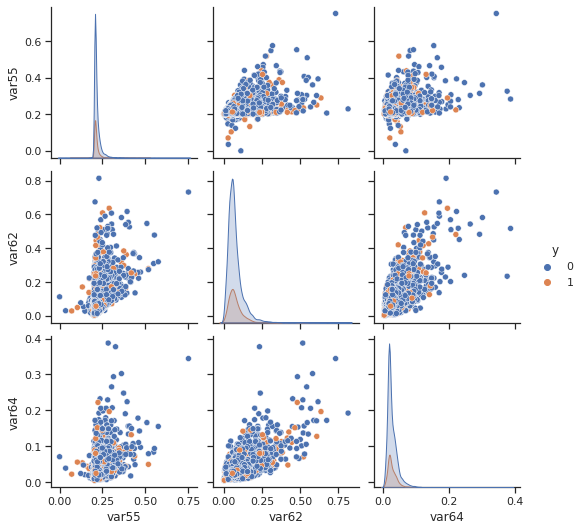

In [95]:
import seaborn as sns
sns.set_theme(style = "ticks")

sns.pairplot(dados[['var55','var62','var64','y']], hue = "y");

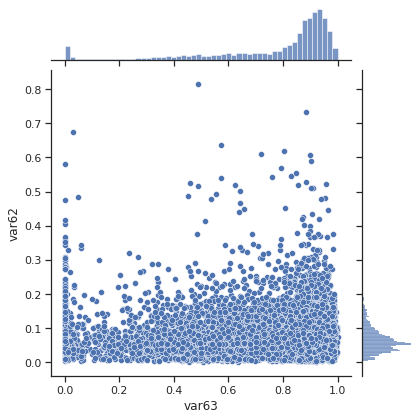

In [96]:
import seaborn as sns
sns.set_theme(style = "ticks")

sns.jointplot(x=dados['var63'], y=dados['var62']);

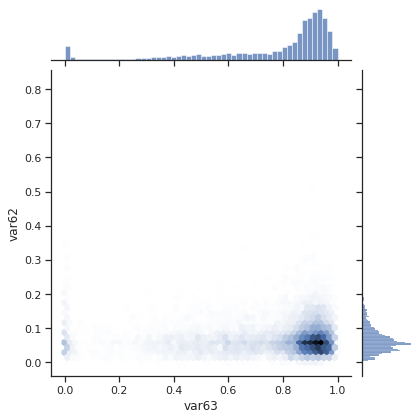

In [97]:
import seaborn as sns
sns.set_theme(style = "ticks")

sns.jointplot(x=dados['var63'], y=dados['var62'], kind="hex");

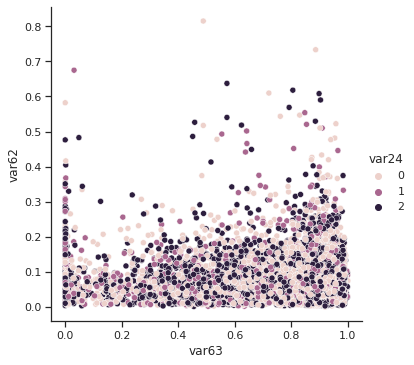

In [98]:
sns.relplot(x=dados['var63'], y=dados['var62'], hue="var24", sizes=(15, 200), data=dados);

#### Boxplot

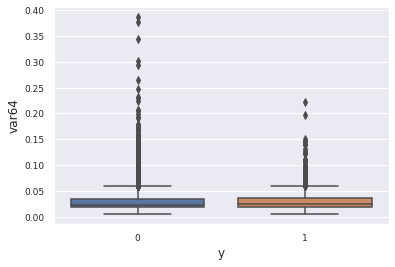

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

ax = sns.boxplot(x = 'y', y = 'var64', data = dados)
ax.tick_params(labelsize = 9)
plt.show();

####  HeateMap

In [103]:
correlacao.round(2)

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
var55,1.00,-0.01,-0.01,-0.02,-0.01,-0.00,0.00,0.38,-0.06,0.41,0.02,0.02
var56,-0.01,1.00,1.00,0.74,0.78,0.36,0.01,0.01,0.00,0.00,0.11,0.11
var57,-0.01,1.00,1.00,0.74,0.78,0.36,0.01,0.01,0.00,0.00,0.11,0.11
var58,-0.02,0.74,0.74,1.00,0.64,0.31,0.00,0.02,0.00,0.01,0.09,0.09
var59,-0.01,0.78,0.78,0.64,1.00,0.44,0.06,0.02,0.01,0.02,0.11,0.11
var60,-0.00,0.36,0.36,0.31,0.44,1.00,0.04,0.02,-0.00,0.08,0.14,0.14
var61,0.00,0.01,0.01,0.00,0.06,0.04,1.00,0.01,0.01,0.01,0.02,0.02
var62,0.38,0.01,0.01,0.02,0.02,0.02,0.01,1.00,-0.02,0.61,0.02,0.02
var63,-0.06,0.00,0.00,0.00,0.01,-0.00,0.01,-0.02,1.00,-0.10,0.01,0.01
var64,0.41,0.00,0.00,0.01,0.02,0.08,0.01,0.61,-0.10,1.00,0.03,0.03


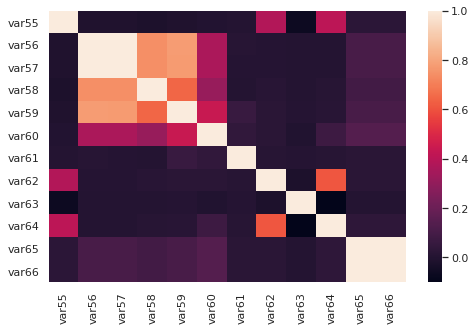

In [100]:
f, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(correlacao);

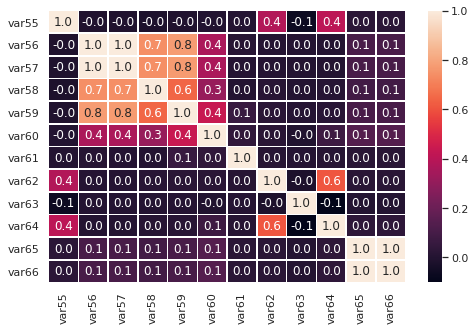

In [104]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6);

#### Barras

>  Variaveis Categoricas, Contagens

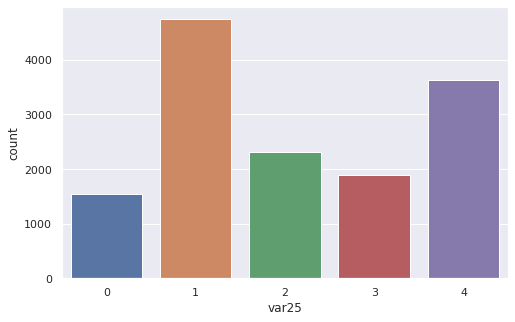

In [105]:
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x = "var25",  data = dados);

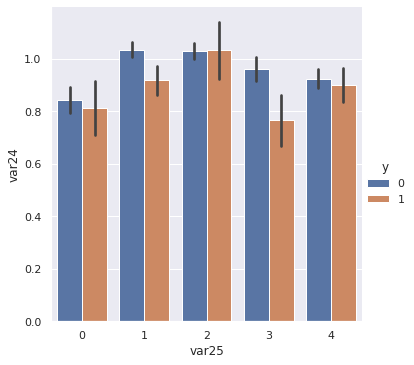

In [106]:
sns.catplot(x="var25", y="var24", hue="y", kind="bar", data=dados);

#### Histograma

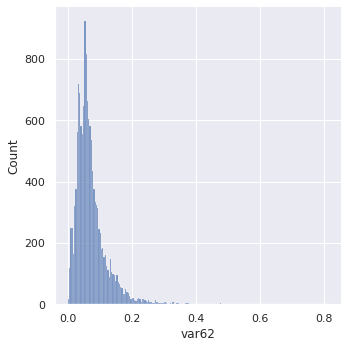

In [107]:
sns.displot(dados, x="var62");

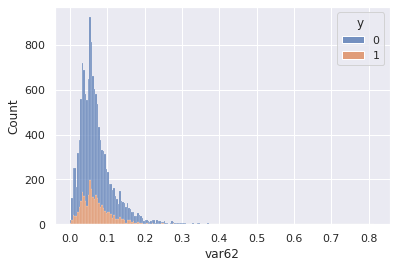

In [112]:
sns.histplot(data=dados, x="var62", hue="y", multiple="stack");

# Style DataFrame

> Fonte: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [113]:
def style_negative(v, props=''):
    return props if v < 0 else None

dados[continuas].describe().T\
    .style.applymap(style_negative, props='color:red;')\
    .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)

,count,mean,std,min,25%,50%,75%,max
var55,14123.000000,0.216031,0.022642,0.000000,0.205161,0.209465,0.218285,0.750858
var56,14123.000000,-111.822517,315.671274,-999.000000,0.117000,0.371000,0.784000,1.000000
var57,14123.000000,-112.092123,315.799354,-999.000000,0.031183,0.101075,0.451613,1.000000
var58,14123.000000,-111.022124,314.158769,-999.000000,0.017456,0.048370,0.141959,1.000000
var59,14123.000000,-154.157900,361.158606,-999.000000,0.097918,0.179503,0.257848,0.913773
var60,14123.000000,-458.540340,497.945633,-999.000000,-999.000000,0.009003,0.152328,1.000000
var61,14123.000000,-24.210294,154.485314,-999.000000,0.169428,0.239625,0.341919,0.934994
var62,14123.000000,0.073086,0.053963,0.000000,0.040391,0.060265,0.088831,0.814846
var63,14123.000000,0.779221,0.234068,0.000000,0.706357,0.877901,0.930373,1.000000
var64,14123.000000,0.028778,0.018681,0.004267,0.018357,0.023480,0.034581,0.387386


In [114]:
cm = sns.light_palette("green", as_cmap=True)
dados[continuas].describe().T.style.background_gradient(cmap=cm)

,count,mean,std,min,25%,50%,75%,max
var55,14123.000000,0.216031,0.022642,0.000000,0.205161,0.209465,0.218285,0.750858
var56,14123.000000,-111.822517,315.671274,-999.000000,0.117000,0.371000,0.784000,1.000000
var57,14123.000000,-112.092123,315.799354,-999.000000,0.031183,0.101075,0.451613,1.000000
var58,14123.000000,-111.022124,314.158769,-999.000000,0.017456,0.048370,0.141959,1.000000
var59,14123.000000,-154.157900,361.158606,-999.000000,0.097918,0.179503,0.257848,0.913773
var60,14123.000000,-458.540340,497.945633,-999.000000,-999.000000,0.009003,0.152328,1.000000
var61,14123.000000,-24.210294,154.485314,-999.000000,0.169428,0.239625,0.341919,0.934994
var62,14123.000000,0.073086,0.053963,0.000000,0.040391,0.060265,0.088831,0.814846
var63,14123.000000,0.779221,0.234068,0.000000,0.706357,0.877901,0.930373,1.000000
var64,14123.000000,0.028778,0.018681,0.004267,0.018357,0.023480,0.034581,0.387386


In [115]:
dados[continuas].describe().T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,count,mean,std,min,25%,50%,75%,max
var55,14123.000000,0.216031,0.022642,0.000000,0.205161,0.209465,0.218285,0.750858
var56,14123.000000,-111.822517,315.671274,-999.000000,0.117000,0.371000,0.784000,1.000000
var57,14123.000000,-112.092123,315.799354,-999.000000,0.031183,0.101075,0.451613,1.000000
var58,14123.000000,-111.022124,314.158769,-999.000000,0.017456,0.048370,0.141959,1.000000
var59,14123.000000,-154.157900,361.158606,-999.000000,0.097918,0.179503,0.257848,0.913773
var60,14123.000000,-458.540340,497.945633,-999.000000,-999.000000,0.009003,0.152328,1.000000
var61,14123.000000,-24.210294,154.485314,-999.000000,0.169428,0.239625,0.341919,0.934994
var62,14123.000000,0.073086,0.053963,0.000000,0.040391,0.060265,0.088831,0.814846
var63,14123.000000,0.779221,0.234068,0.000000,0.706357,0.877901,0.930373,1.000000
var64,14123.000000,0.028778,0.018681,0.004267,0.018357,0.023480,0.034581,0.387386


---


**Autor**: Guilherme Ribeiro Maia

**Contato**: 
email: `gribeiromaia91@gmail.com`

linkedin: https://www.linkedin.com/in/guilherme-ribeiro-maia-650589112/

<br>
<img align="left" width="280" src="https://hermes.digitalinnovation.one/site/images/logo-sm-white.png"/>
<br>